**Title:Loan Approval with Explainable Ai**

Problem Satatment:The traditional loan approval process in banks is often time-consuming, prone to human bias, and lacks transparency, leading to inefficiencies and customer dissatisfaction. Machine learning  models have emerged as tools to streamline this process by offering faster and more accurate decision-making based on factors like credit scores and income. However, these models, often operating as "black boxes," pose challenges in interpretability and transparency, which can erode trust between financial institutions and applicants.Explainable AI addresses these challenges by making ML model decisions more interpretable, fostering trust and fairness.


**Project Steps**:

 **1.Data collection and cleaning :** In this Step data is loaded and read using pandas and check for any null and dupicate values present in the dataset.

 **2.Exploratory Data Analysis(EDA):** After Cleaning The dataset it is time to explore the dataset for any insights present in the data using Matplotlib Plotting graphs and Heat map and Boxplot.

**3.Train and test split**: we have using 80 to 20 split ratio to split the dataset for tarining and test.

**4.Implementing Machine learning Algorithm**: In this we are Implenting Machine Learning Algorithms using Gridsearch Cv. we have used 4 ML algorithms
**Decision Tree, SVC, Random forest** and  **Gradient Bossting**

**5.Interpreting Using XAI** : After getting the Best model we can explain that model using SHAP algorithm and also interpret particular decison.



## **Data collection and Data  Cleaning**


# Reading dataset and Checking Null values



Necessary Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from imblearn.over_sampling import SMOTE
import joblib


Reading the dataset using pandas
Dataset:https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/data

In [ ]:
Loan_dataset=pd.read_csv('/content/loan_approval_dataset.csv')
Loan_dataset.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Shape of the data set

In [ ]:
Loan_dataset.shape

(4269, 13)

Information about the datset

In [ ]:
Loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


Checking the null values

In [ ]:
Loan_dataset.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


Check any duplicate values

In [ ]:
Loan_dataset.duplicated().sum()

0

In [ ]:
Loan_dataset=Loan_dataset.drop(columns='loan_id')

# Lable Encoding

Lable Encoding the necessary Columns

In [ ]:
le=LabelEncoder()
for column in Loan_dataset.columns:                    #Looping through dataset colums
    if Loan_dataset[column].dtype == 'object':         #checking if the column is object
        print(f"Column '{column}' has {Loan_dataset[column].nunique()} unique values:{Loan_dataset[column].value_counts()}")
        Loan_dataset[column] = le.fit_transform(Loan_dataset[column],)               #Changing the object Type to integer through label encoding
        print("............................After lable encoding................................")
        print(Loan_dataset[column].value_counts())
        print("................................................................................")

Column ' education' has 2 unique values: education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64
............................After lable encoding................................
 education
0    2144
1    2125
Name: count, dtype: int64
................................................................................
Column ' self_employed' has 2 unique values: self_employed
Yes    2150
No     2119
Name: count, dtype: int64
............................After lable encoding................................
 self_employed
1    2150
0    2119
Name: count, dtype: int64
................................................................................
Column ' loan_status' has 2 unique values: loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64
............................After lable encoding................................
 loan_status
0    2656
1    1613
Name: count, dtype: int64
...........................................................................

In [ ]:
print(Loan_dataset.columns)

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


# Boxplot and Outliers removal

**Box plot **: To find outliers Present in the data

 we can see from the plot residential_assests_value ,Commercial_assests_value,bank_assests_value have outliers


<Axes: >

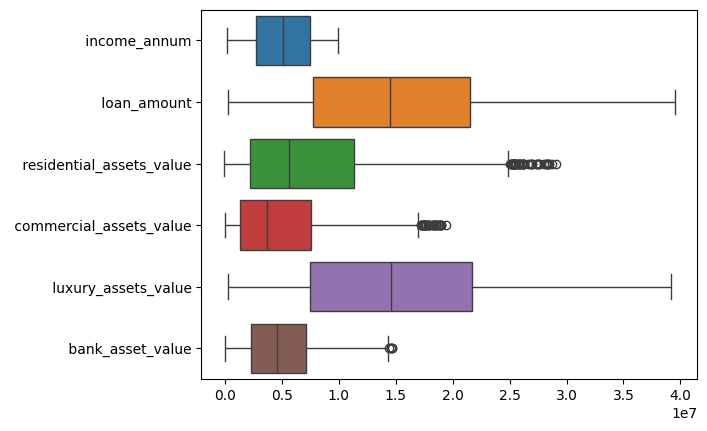

In [ ]:

columns_to_plot=[' income_annum', ' loan_amount',' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value']          #taken the continuous  columns to find any outliers present

sns.boxplot(Loan_dataset[columns_to_plot],orient='h')        #box plot using Seaborn


We are using Qunatile method to find the lower bound and upper bound so we can get the outliers. We can see the outlier values for the mentioned Columns

In [ ]:
'''outlier_colums=[' residential_assets_value', ' commercial_assets_value', ' bank_asset_value']
for column in outlier_colums:
    Q1=Loan_dataset[column].quantile(0.25)
    Q3=Loan_dataset[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    print("column name", column)
    x=Loan_dataset[(Loan_dataset[column]<lower_bound)]
    y=Loan_dataset[(Loan_dataset[column]>upper_bound)]
    Loan_dataset[column+"difference"]=Loan_dataset[column]-upper_bound
    print("upper bound :",upper_bound)
    print(Loan_dataset[(Loan_dataset[column]>upper_bound)][[column,column+"difference"]])
    print("Count of ouliers")

    print(len(x),len(y))
    print("................................................................................")
    Loan_dataset=Loan_dataset.drop(columns=[column+"difference"])
    Loan_dataset=Loan_dataset[Loan_dataset[column]<=upper_bound]'''

'outlier_colums=[\' residential_assets_value\', \' commercial_assets_value\', \' bank_asset_value\']\nfor column in outlier_colums:\n    Q1=Loan_dataset[column].quantile(0.25)\n    Q3=Loan_dataset[column].quantile(0.75)\n    IQR=Q3-Q1\n    lower_bound=Q1-1.5*IQR\n    upper_bound=Q3+1.5*IQR\n    print("column name", column)\n    x=Loan_dataset[(Loan_dataset[column]<lower_bound)]\n    y=Loan_dataset[(Loan_dataset[column]>upper_bound)]\n    Loan_dataset[column+"difference"]=Loan_dataset[column]-upper_bound\n    print("upper bound :",upper_bound)\n    print(Loan_dataset[(Loan_dataset[column]>upper_bound)][[column,column+"difference"]])\n    print("Count of ouliers")\n\n    print(len(x),len(y))\n    print("................................................................................")\n    Loan_dataset=Loan_dataset.drop(columns=[column+"difference"])\n    Loan_dataset=Loan_dataset[Loan_dataset[column]<=upper_bound]'

# **Exploratory Data Analysis**

# Bar Plot for Loan status

Bar Plot For Loan status

we have more approved data than rejected

[Text(0, 0, 'Approved'), Text(1, 0, 'Rejected')]

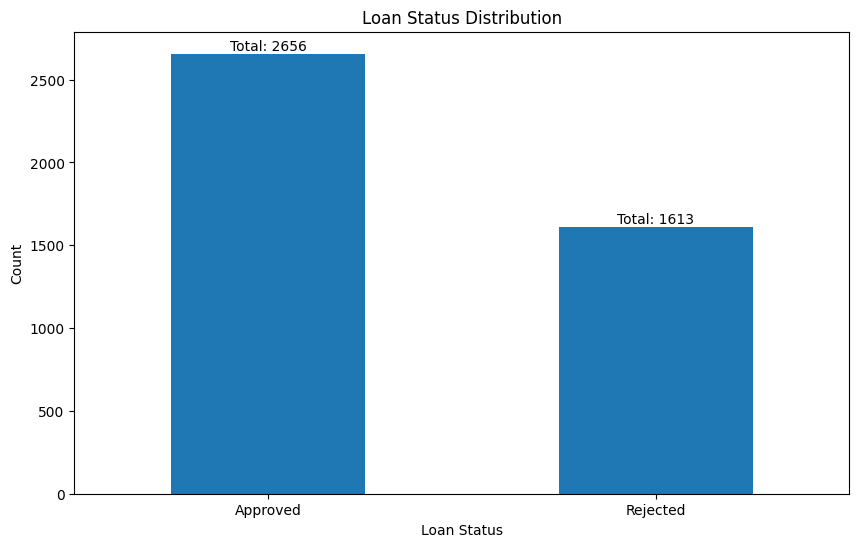

In [ ]:
plt.figure(figsize=(10,6))


bar_plot = Loan_dataset[' loan_status'].value_counts().sort_index().plot(kind='bar')   #Counting the unique values using value count
totals=Loan_dataset[' loan_status'].value_counts().sort_index()                        #sorting the values
for i, total in enumerate(totals):                                                     # to display values on bar graph using Plt.text function
    bar_plot.text(i, total, f'Total: {total}',
            ha='center', va='bottom')
bar_plot.set_title('Loan Status Distribution')
bar_plot.set_xlabel('Loan Status')
bar_plot.set_ylabel('Count')


bar_plot.set_xticklabels(['Approved','Rejected',], rotation=0)

In [ ]:
Loan_dataset.shape

(4269, 12)

# BarPlot Group by colums and loan status

Below we have categorised the annual income into 3 bins which are low,medium high and we are plot a bar plot of categorised income and there approval status.

The bar chart states that approval and rejection of loan is same through out all brackets of income where approximatly 60-65% is  for approved and 35-40% is for rejected not any large change

<ipython-input-144-a0923aa0f682>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_approval = Loan_dataset.groupby(['income_bracket', ' loan_status']).size().unstack()  #grouping income label and loan_status


[' 64.5%', ' 61.1%', ' 62.0%']
[' 35.5%', ' 38.9%', ' 38.0%']


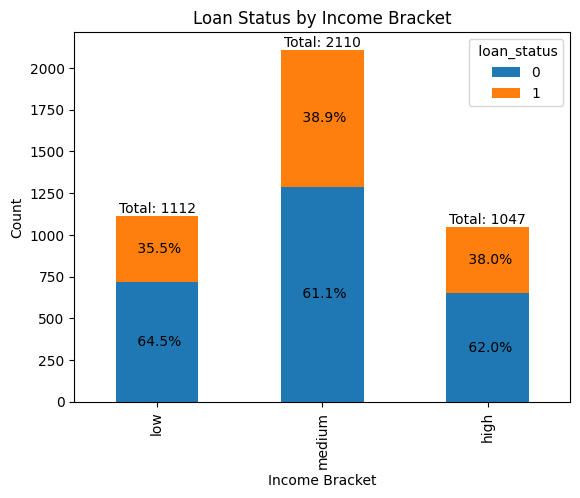

In [ ]:
Q1=Loan_dataset[' income_annum'].quantile(0.25)
Q3=Loan_dataset[' income_annum'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
 # Create a new column in the Loan_dataset for asset brackets by binning the Income values  into 3 categories
Loan_dataset['income_bracket']=pd.cut(Loan_dataset[' income_annum'],bins=[lower_bound,Q1,Q3,max(Loan_dataset[' income_annum'])],labels=['low','medium','high'])
income_approval = Loan_dataset.groupby(['income_bracket', ' loan_status']).size().unstack()  #grouping income label and loan_status
ax=income_approval.plot(kind='bar', stacked=True, title='Loan Status by Income Bracket')     #bar graph plot for grouped values
totals = income_approval.sum(axis=1)    # Calculate the total count of loans in each asset bracket
total=totals.values
# Add percentage labels to each bar in the chart
for c in ax.containers:
  a=c.datavalues
  # Calculate percentage for each bar and format it as a label
  label=[f' {((a[i]/total[i])*100):.1f}%' for i in range(len(total))]
  print(label)
  ax.bar_label(c,labels=label,label_type='center')
# Add total loan counts above each bar group
for i, total in enumerate(totals):
    ax.text(i, total, f'Total: {total}',
            ha='center', va='bottom')
plt.xlabel('Income Bracket')
plt.ylabel('Count')
plt.show()
Loan_dataset.drop(columns=['income_bracket'],inplace=True)

We have Drawn similar bar plots like above for these columns **' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value'** with loan approval status


The bar chart of these features states that approval and rejection of loan is same through out all brackets of these features  where approximatly 60% is approved and 40% is rejected

<ipython-input-145-6482f0112624>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_by_assets = Loan_dataset.groupby([f'{asset}_bracket', ' loan_status']).size().unstack()   #grouping the new asset bracket and Loan status


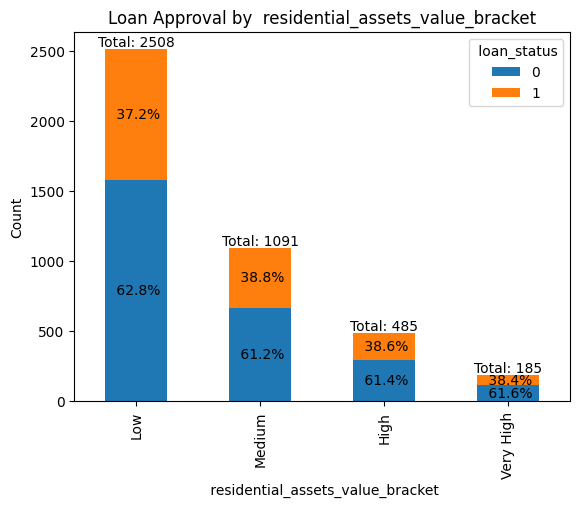

<ipython-input-145-6482f0112624>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_by_assets = Loan_dataset.groupby([f'{asset}_bracket', ' loan_status']).size().unstack()   #grouping the new asset bracket and Loan status


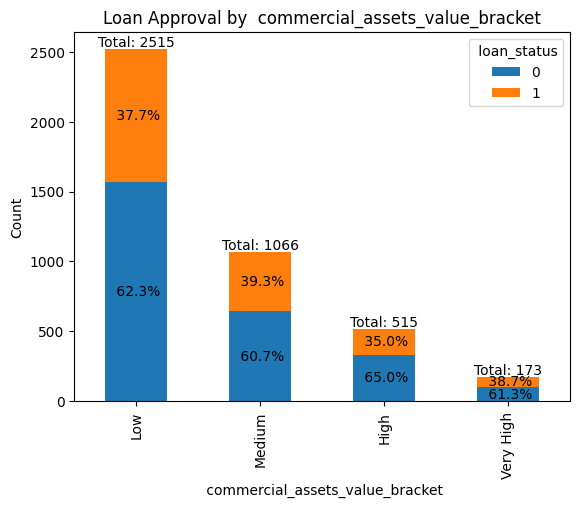

<ipython-input-145-6482f0112624>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_by_assets = Loan_dataset.groupby([f'{asset}_bracket', ' loan_status']).size().unstack()   #grouping the new asset bracket and Loan status


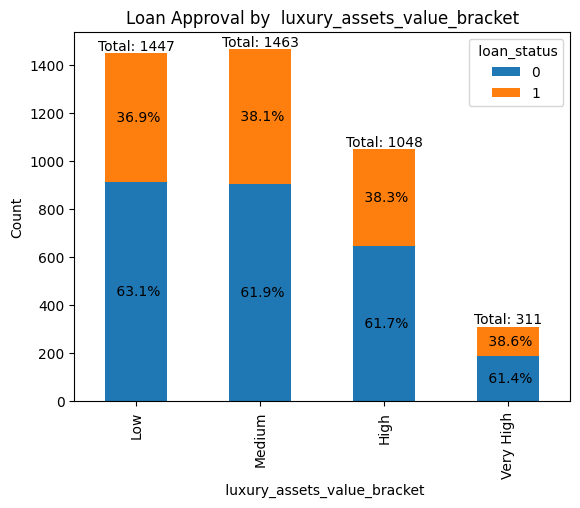

<ipython-input-145-6482f0112624>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_by_assets = Loan_dataset.groupby([f'{asset}_bracket', ' loan_status']).size().unstack()   #grouping the new asset bracket and Loan status


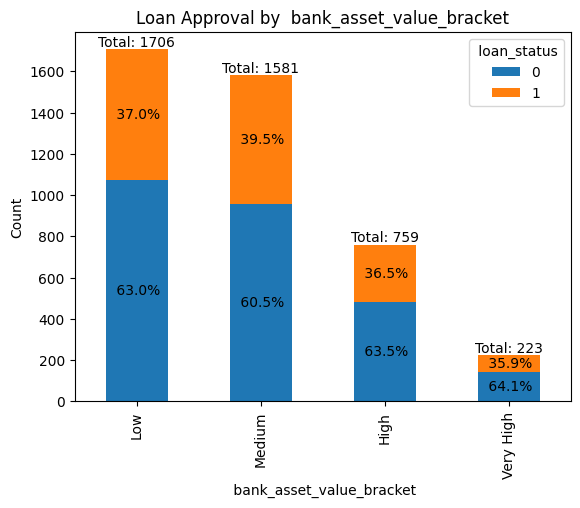

In [ ]:
asset_columns = [' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value']                         #taking necessary columns to draw graph
for asset in asset_columns:
    # Create a new column in the Loan_dataset for asset brackets by binning the asset values into 4 categories
    Loan_dataset[f'{asset}_bracket'] = pd.cut(Loan_dataset[asset], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])

    approval_by_assets = Loan_dataset.groupby([f'{asset}_bracket', ' loan_status']).size().unstack()   #grouping the new asset bracket and Loan status
    ax=approval_by_assets.plot(kind='bar', stacked=True)
    totals = approval_by_assets.sum(axis=1)  # Calculate the total count of loans in each asset bracket
    total=totals.values
    for c in ax.containers:                  # Add percentage labels to each bar in the chart
      a=c.datavalues
      label=[f' {((a[i]/total[i])*100):.1f}%' for i in range(len(total))]      # Calculate percentage for each bar and format it as a label
      ax.bar_label(c,labels=label, label_type='center')

    for i, total in enumerate(totals):                                         # Add total loan counts above each bar group
      ax.text(i, total, f'Total: {total}',
            ha='center', va='bottom')
    plt.xlabel(f'{asset}_bracket')
    plt.ylabel('Count')
    plt.title(f'Loan Approval by {asset}_bracket')
    plt.show()
    Loan_dataset.drop(columns=[f'{asset}_bracket'], inplace=True)

the chart suggests that a higher proportion of loans were approved for applicants with education level 1(non Graduate) compared to those with education level 0(Graduate)

Here also we can see even education has same range of approvals and rejections for both graduated and not graduated

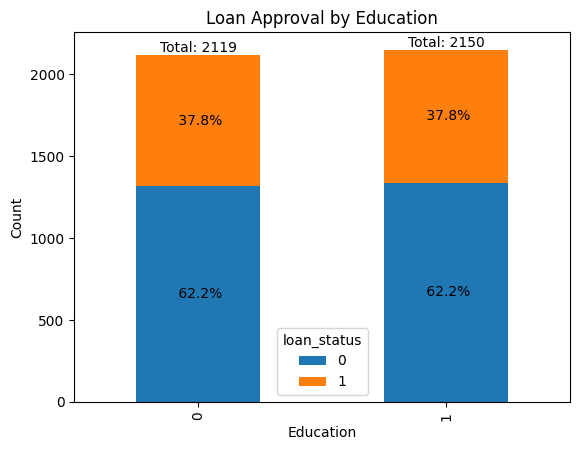

In [ ]:
import matplotlib.pyplot as plt

# Create the stacked bar plot
approval_by_assets = Loan_dataset.groupby([' self_employed', ' loan_status']).size().unstack() #grouping the self employed and loan status
ax = approval_by_assets.plot(kind='bar', stacked=True)
totals = approval_by_assets.sum(axis=1)   # Calculate the total count of loans in each asset bracket
total=totals.values
for c in ax.containers:                   # Add percentage labels to each bar in the chart
    a=c.datavalues
    label=[f' {((a[i]/total[i])*100):.1f}%' for i in range(len(total))]         # Calculate percentage for each bar and format it as a label
    ax.bar_label(c,labels=label,label_type='center')
totals = approval_by_assets.sum(axis=1)
for i, total in enumerate(totals):                                              # Add total loan counts above each bar group
    ax.text(i, total, f'Total: {total}',
            ha='center', va='bottom')

plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Loan Approval by Education')
plt.legend(title='loan_status')

plt.show()

# Correlation Heat Map

Below we can a correlation Heat map for dataset . From the Heat map  we observe that the CIBIL score is strongly negatively correlated with loan status (-0.77), indicating that higher CIBIL scores are strongly associated with loan approvals. The remaining features show either moderate or weak correlations with the output variable, loan status. This suggests that the output is influenced by a combination of all features, and to accurately predict loan status, it is essential to consider all the variables in the dataset.


<Axes: >

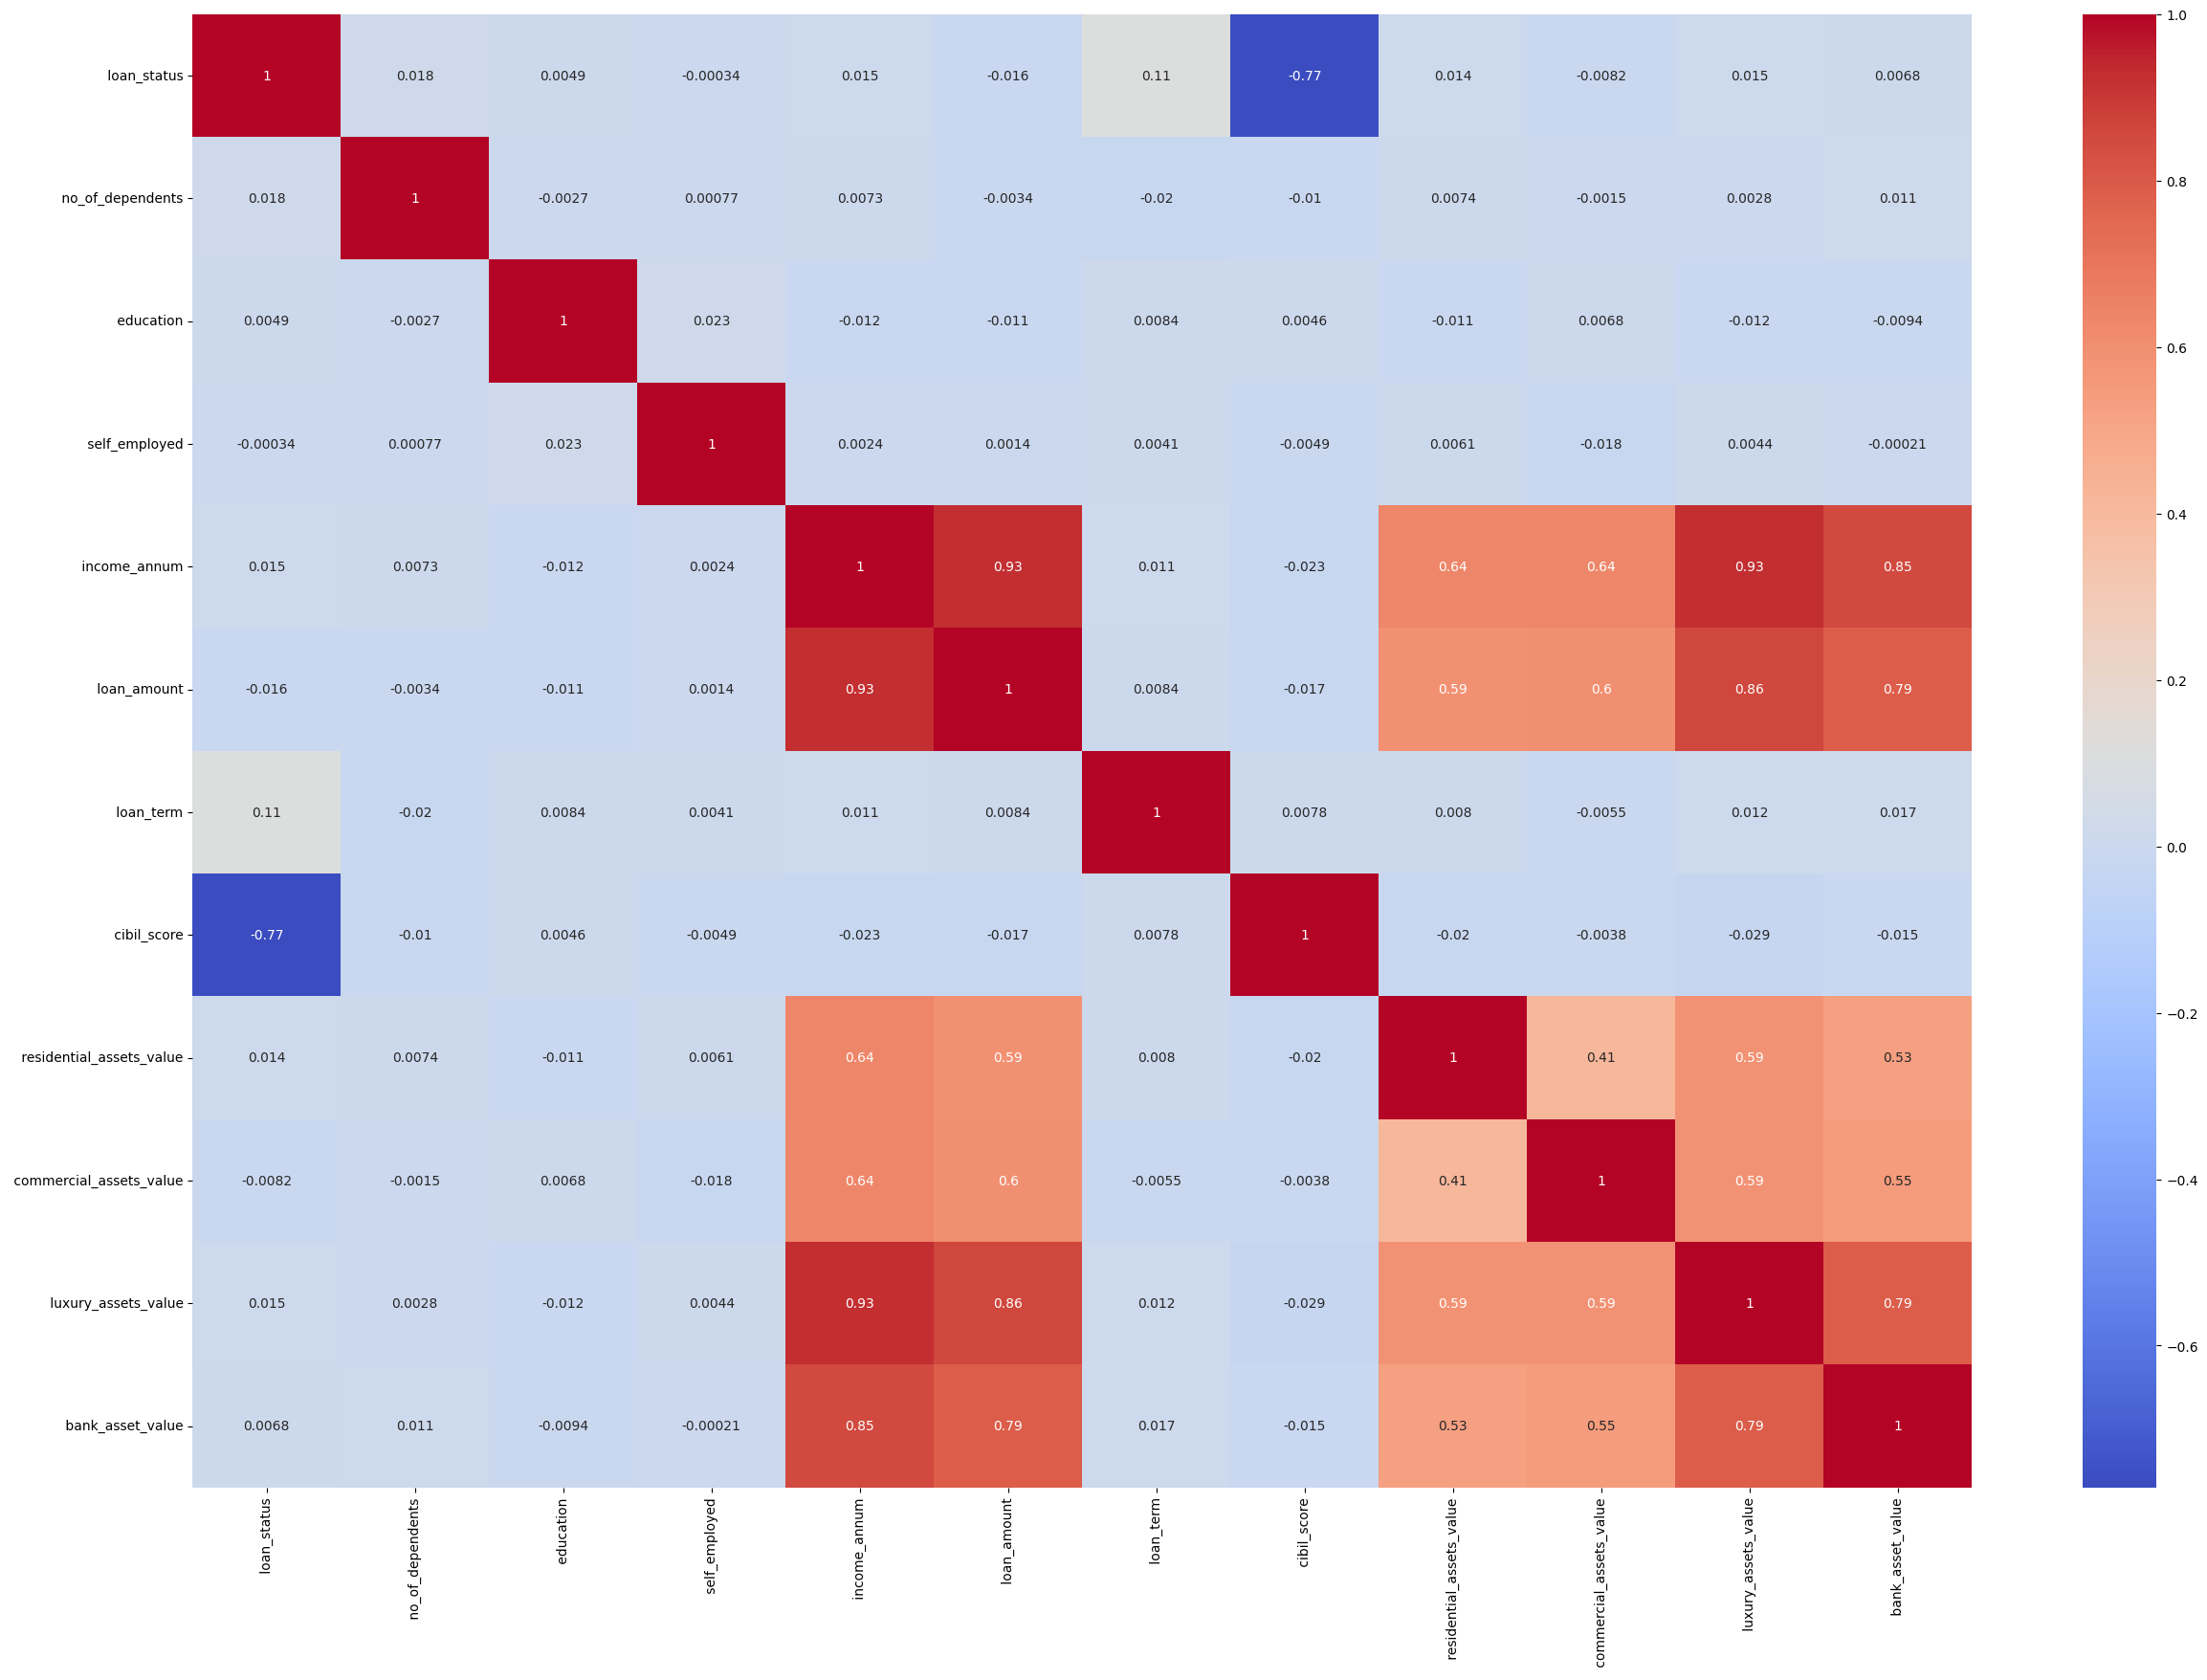

In [ ]:
Loan_dataset_corr=Loan_dataset.copy()
Loan_dataset_corr=Loan_dataset_corr[[' loan_status',' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value' ]]       #re-arranging the columns to get Loan status at top
plt.figure(figsize=(30,20))
sns.heatmap(Loan_dataset_corr.corr(),annot=True, cmap='coolwarm')

  From the chart, it is evident that every category exhibits a similar pattern, with approximately 60% loan approvals and 40% loan rejections . This consistent distribution across all groups indicates that graduate and self-employment status alone do not significantly influence loan approval  outcomes.


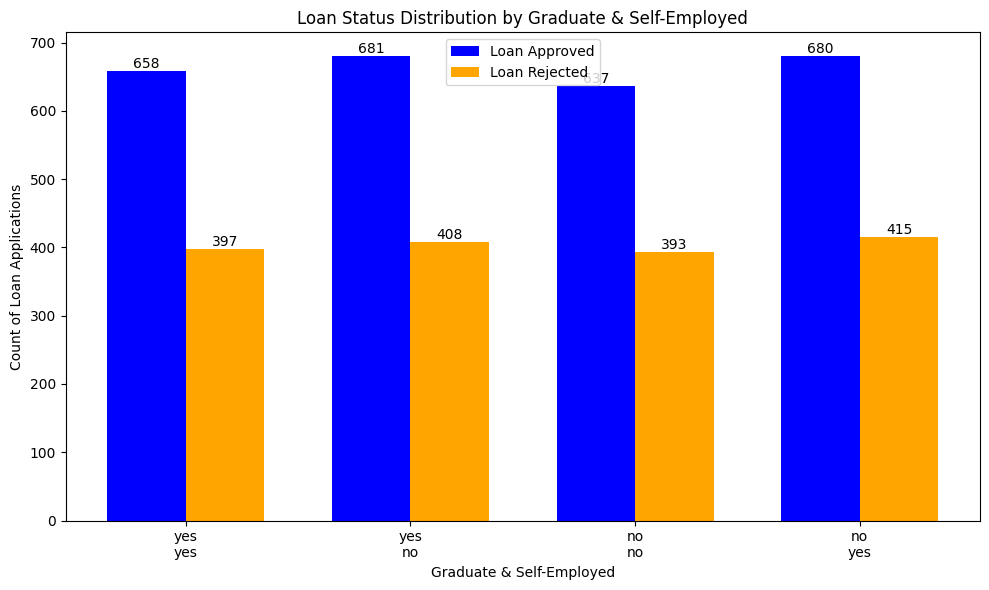

In [ ]:
#caluclating the count of both approval and rejection for every scenario
graduate_selfemp=Loan_dataset[(Loan_dataset[' education']==0) & (Loan_dataset[' self_employed']==1)][' loan_status'].value_counts()
graduate_notselfemp=Loan_dataset[(Loan_dataset[' education']==0) & (Loan_dataset[' self_employed']==0)][' loan_status'].value_counts()
notgraduate_selfemp=Loan_dataset[(Loan_dataset[' education']==1) & (Loan_dataset[' self_employed']==1)][' loan_status'].value_counts()
notgraduate_notselfemp=Loan_dataset[(Loan_dataset[' education']==1) & (Loan_dataset[' self_employed']==0)][' loan_status'].value_counts()
graduate=['yes','yes','no','no']
self_employed=['yes','no','no','yes']
#splitting the values into approved and rejected category
loan_approved=[graduate_selfemp[0],graduate_notselfemp[0],notgraduate_notselfemp[0],notgraduate_selfemp[0]]
loan_rejected=[graduate_selfemp[1],graduate_notselfemp[1],notgraduate_notselfemp[1],notgraduate_selfemp[1]]
plt.figure(figsize=(10, 6))
index = range(len(graduate))
bar_width = 0.35
plt.bar(index, loan_approved, bar_width, label='Loan Approved', color='blue')  #plot the bar graph for approved
plt.bar([i + bar_width for i in index], loan_rejected, bar_width, label='Loan Rejected', color='orange')  #plot for the bar graph for rejected next to approved
for i in range(len(index)):                                     #adding approved totals to the bar
    plt.text(i, loan_approved[i], str(loan_approved[i]), ha='center', va='bottom')
for i in range(len(index)):                                     #adding rejected totals to the bar
    plt.text(i + bar_width, loan_rejected[i], str(loan_rejected[i]), ha='center', va='bottom')
plt.xlabel('Graduate & Self-Employed')
plt.ylabel('Count of Loan Applications')
plt.title('Loan Status Distribution by Graduate & Self-Employed')
plt.xticks([i + bar_width/2 for i in index], [f'{g}\n{s}' for g, s in zip(graduate, self_employed)])
plt.legend()
plt.tight_layout()
plt.show()



Checking the data set is balanced or not balanced.
From the output we can see that dataset is inbalanced with 1:6.5 ratio

In [ ]:
Data_set_balance=list(Loan_dataset[' loan_status'].value_counts())
print(Data_set_balance[0]/Data_set_balance[1])

1.6466212027278364


# Training and test split

   Splitting the data into Input features X and output feature Y

In [ ]:
X=Loan_dataset.drop(columns=' loan_status') #dropping the target column
y=Loan_dataset[' loan_status']

In [ ]:
X.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value'],
      dtype='object')

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) #splitting the data into train and test with 80% training and 20% to test

Calucating the Iqr values to remove outliers

In [ ]:
outlier_colums=[' residential_assets_value', ' commercial_assets_value', ' bank_asset_value'] #outlier found columns
traindata_nooutliers=pd.concat([X_train,y_train],axis=1)
for column in outlier_colums:                                                   #looping these columns
    Q1=Loan_dataset[column].quantile(0.25)
    Q3=Loan_dataset[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    traindata_nooutliers=traindata_nooutliers[traindata_nooutliers[column]<=upper_bound]          #removing outliers in these columns

Creating one more train and test with  no outliers

In [ ]:

X_train_nooutliers=traindata_nooutliers.drop(columns=' loan_status')
y_train_nooutliers=traindata_nooutliers[' loan_status']


Standerd Scaler

applying standerd scale to training data

In [ ]:
sc=StandardScaler()
X_std=sc.fit_transform(X)

applying standerd scale to outlier removed training data

In [ ]:
sc=StandardScaler()
X_std_outlier=sc.fit_transform(X_train_nooutliers)

Splitting the data into training and test for standeredd scalre data

In [ ]:
X_train_std,X_test_std,y_train_std,y_test_std=train_test_split(X_std,y,test_size=0.2,random_state=42)


Sclaing The unbalanced dataset with smote

In [ ]:

print(y_train.value_counts())

sm = SMOTE(random_state=42) #defining smote with random state 42 to add same set of values for every run

X_sm, y_sm = sm.fit_resample(X_train, y_train)           # sampling the training data

print(y_sm.value_counts())


 loan_status
0    2120
1    1295
Name: count, dtype: int64
 loan_status
0    2120
1    2120
Name: count, dtype: int64


standered scaling the smote data

In [ ]:
sc=StandardScaler()
X_sm_std=sc.fit_transform(X_sm)

In [ ]:
'''X_sm_train,X_sm_test,y_sm_train,y_sm_test=train_test_split(X_sm_std,y_sm,test_size=0.2,random_state=42)'''

'X_sm_train,X_sm_test,y_sm_train,y_sm_test=train_test_split(X_sm_std,y_sm,test_size=0.2,random_state=42)'

Training set after sampling

# Decision Tree

creating a function decision tree so we can call the function with all the training dataset using Grid search Cv where we are passing several Hyperparameters

In [ ]:



def DecisionTree(X_train,X_test,y_train,y_test):
  model=DecisionTreeClassifier()
  params = {'criterion':['gini','entropy','log_loss'], 'max_depth':[2,3,4,5]}   #creating a dictionary of hyperparameters to pass to the model
  grid = GridSearchCV(model, param_grid=params, verbose=0)                      # defining the model with hyperparametrs  using grid search cv setting verbose 0 to see only the output
  grid.fit(X_train, y_train)                                                    #fit the training data into the model

  print(grid.best_estimator_)                                                   #finding the best parameters

  y_pred_train = grid.predict(X_train)                                          #predicting the values with input training
  print("The train results are:")
  cm=confusion_matrix(y_train,y_pred_train)                                     #Training confusion matrix
  print(cm)
  cr=classification_report(y_train,y_pred_train)                                 #Training classification report
  print(cr)

  # Results on the test data
  y_pred = grid.predict(X_test)                                                 #predicting the values with input testing data
  print("The test results are:")
  cm=confusion_matrix(y_test,y_pred)                                            #Testing confusion matrix
  print(cm)
  cr=classification_report(y_test,y_pred)                                        #Testing classification report
  print(cr)


Training with Normal data

In [ ]:
DecisionTree(X_train,X_test,y_train,y_test)

DecisionTreeClassifier(criterion='log_loss', max_depth=5)
The train results are:
[[2038   82]
 [  11 1284]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2120
           1       0.94      0.99      0.97      1295

    accuracy                           0.97      3415
   macro avg       0.97      0.98      0.97      3415
weighted avg       0.97      0.97      0.97      3415

The test results are:
[[518  18]
 [  5 313]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       536
           1       0.95      0.98      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.98      0.97       854
weighted avg       0.97      0.97      0.97       854



Training with scaled data

In [ ]:
DecisionTree(X_train_std,X_test_std,y_train_std,y_test_std)

DecisionTreeClassifier(criterion='entropy', max_depth=5)
The train results are:
[[2038   82]
 [  11 1284]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2120
           1       0.94      0.99      0.97      1295

    accuracy                           0.97      3415
   macro avg       0.97      0.98      0.97      3415
weighted avg       0.97      0.97      0.97      3415

The test results are:
[[518  18]
 [  5 313]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       536
           1       0.95      0.98      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.98      0.97       854
weighted avg       0.97      0.97      0.97       854



Traindata with outliers removed

In [ ]:
DecisionTree(X_train_nooutliers,X_test,y_train_nooutliers,y_test)

DecisionTreeClassifier(criterion='log_loss', max_depth=5)
The train results are:
[[1991   82]
 [  11 1254]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2073
           1       0.94      0.99      0.96      1265

    accuracy                           0.97      3338
   macro avg       0.97      0.98      0.97      3338
weighted avg       0.97      0.97      0.97      3338

The test results are:
[[518  18]
 [  4 314]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       536
           1       0.95      0.99      0.97       318

    accuracy                           0.97       854
   macro avg       0.97      0.98      0.97       854
weighted avg       0.98      0.97      0.97       854



Training scaled data with outliers removed  

In [ ]:
DecisionTree(X_std_outlier,X_test_std,y_train_nooutliers,y_test_std)

DecisionTreeClassifier(criterion='entropy', max_depth=5)
The train results are:
[[1991   82]
 [  11 1254]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2073
           1       0.94      0.99      0.96      1265

    accuracy                           0.97      3338
   macro avg       0.97      0.98      0.97      3338
weighted avg       0.97      0.97      0.97      3338

The test results are:
[[517  19]
 [ 10 308]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       536
           1       0.94      0.97      0.96       318

    accuracy                           0.97       854
   macro avg       0.96      0.97      0.96       854
weighted avg       0.97      0.97      0.97       854



Training  sampled data

In [ ]:
DecisionTree(X_sm,X_test,y_sm,y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=5)
The train results are:
[[2039   81]
 [  15 2105]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2120
           1       0.96      0.99      0.98      2120

    accuracy                           0.98      4240
   macro avg       0.98      0.98      0.98      4240
weighted avg       0.98      0.98      0.98      4240

The test results are:
[[518  18]
 [  5 313]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       536
           1       0.95      0.98      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.98      0.97       854
weighted avg       0.97      0.97      0.97       854



Training with scaled sampled data

In [ ]:
DecisionTree(X_sm_std,X_test_std,y_sm,y_test_std)

DecisionTreeClassifier(criterion='log_loss', max_depth=5)
The train results are:
[[2039   81]
 [  15 2105]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2120
           1       0.96      0.99      0.98      2120

    accuracy                           0.98      4240
   macro avg       0.98      0.98      0.98      4240
weighted avg       0.98      0.98      0.98      4240

The test results are:
[[464  72]
 [  5 313]]
              precision    recall  f1-score   support

           0       0.99      0.87      0.92       536
           1       0.81      0.98      0.89       318

    accuracy                           0.91       854
   macro avg       0.90      0.92      0.91       854
weighted avg       0.92      0.91      0.91       854



# Svm

creating a Svc function to call the function with several training dataset by passing several hyper parameters

In [ ]:
def SVM(X_train,X_test,y_train,y_test):
  model=svm.SVC(C=10,gamma=0.01,kernel='sigmoid')                   #defining Svm with hyperparameters
  model.fit(X_train, y_train)                       #fitting the training data into the model



  y_pred_train = model.predict(X_train)             #predicting the output with input tarining values
  print("The train results are:")
  cm=confusion_matrix(y_train,y_pred_train)         #confusion matrix for training data
  print(cm)
  print(classification_report(y_train,y_pred_train))   #classification report for training data

  # Results on the test data
  y_pred = model.predict(X_test)                       #predicting the output with input testing values
  print("The test results are:")
  cm=confusion_matrix(y_test,y_pred)                   #confusion matrix for testing values
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))         #classification report for testing values


Train with Normal data

In [ ]:
SVM(X_train,X_test,y_train,y_test)

The train results are:
[[2120    0]
 [1295    0]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      2120
           1       0.00      0.00      0.00      1295

    accuracy                           0.62      3415
   macro avg       0.31      0.50      0.38      3415
weighted avg       0.39      0.62      0.48      3415

The test results are:
[[536   0]
 [318   0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       536
           1       0.00      0.00      0.00       318

    accuracy                           0.63       854
   macro avg       0.31      0.50      0.39       854
weighted avg       0.39      0.63      0.48       854



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Training with scaled data

In [ ]:
SVM(X_train_std,X_test_std,y_train_std,y_test_std)

The train results are:
[[1977  143]
 [ 106 1189]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2120
           1       0.89      0.92      0.91      1295

    accuracy                           0.93      3415
   macro avg       0.92      0.93      0.92      3415
weighted avg       0.93      0.93      0.93      3415

The test results are:
[[496  40]
 [ 29 289]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       536
           1       0.88      0.91      0.89       318

    accuracy                           0.92       854
   macro avg       0.91      0.92      0.91       854
weighted avg       0.92      0.92      0.92       854



Trainin with outlier removed data

In [ ]:
SVM(X_train_nooutliers,X_test,y_train_nooutliers,y_test)

The train results are:
[[2073    0]
 [1265    0]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      2073
           1       0.00      0.00      0.00      1265

    accuracy                           0.62      3338
   macro avg       0.31      0.50      0.38      3338
weighted avg       0.39      0.62      0.48      3338

The test results are:
[[536   0]
 [318   0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       536
           1       0.00      0.00      0.00       318

    accuracy                           0.63       854
   macro avg       0.31      0.50      0.39       854
weighted avg       0.39      0.63      0.48       854



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Training with scaled outlier removed data

In [ ]:
SVM(X_std_outlier,X_test_std,y_train_nooutliers,y_test_std)

The train results are:
[[1934  139]
 [ 103 1162]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2073
           1       0.89      0.92      0.91      1265

    accuracy                           0.93      3338
   macro avg       0.92      0.93      0.92      3338
weighted avg       0.93      0.93      0.93      3338

The test results are:
[[496  40]
 [ 30 288]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       536
           1       0.88      0.91      0.89       318

    accuracy                           0.92       854
   macro avg       0.91      0.92      0.91       854
weighted avg       0.92      0.92      0.92       854



Training with sampled data

In [ ]:
SVM(X_sm,X_test,y_sm,y_test)

The train results are:
[[   0 2120]
 [   0 2120]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2120
           1       0.50      1.00      0.67      2120

    accuracy                           0.50      4240
   macro avg       0.25      0.50      0.33      4240
weighted avg       0.25      0.50      0.33      4240

The test results are:
[[  0 536]
 [  0 318]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       536
           1       0.37      1.00      0.54       318

    accuracy                           0.37       854
   macro avg       0.19      0.50      0.27       854
weighted avg       0.14      0.37      0.20       854



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Training with scaled smple data

In [ ]:
SVM(X_sm_std,X_test_std,y_sm,y_test_std)

The train results are:
[[1962  158]
 [  73 2047]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2120
           1       0.93      0.97      0.95      2120

    accuracy                           0.95      4240
   macro avg       0.95      0.95      0.95      4240
weighted avg       0.95      0.95      0.95      4240

The test results are:
[[448  88]
 [  1 317]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       536
           1       0.78      1.00      0.88       318

    accuracy                           0.90       854
   macro avg       0.89      0.92      0.89       854
weighted avg       0.92      0.90      0.90       854



# RandomForest

Creating a Random Forest Function using Grid search Cv by passing several Hyper paramters

In [ ]:
def Randomforest(X_train,X_test,y_train,y_test):
  model=RandomForestClassifier()                        #defining the random forest model
  params = {'criterion':['gini','entropy','log_loss'], 'max_depth':[2,3,4,5], 'n_estimators':[10,20,100]}  #creating a dictionary of hyperparameters to pass to the model
  grid = GridSearchCV(model, param_grid=params, verbose=0)                  # defining the model with hyperparametrs  using grid search cv setting verbose 0 to see only the output
  grid.fit(X_train, y_train)                                          #fit the trining data

  print(grid.best_estimator_)                                        #finding the best parameters

  y_pred_train = grid.predict(X_train)
  print("The train results are:")
  cm=confusion_matrix(y_train,y_pred_train)                         #confusion matrix for training data
  print(cm)
  print(classification_report(y_train,y_pred_train))               #classification report for training data

  # Results on the test data
  y_pred = grid.predict(X_test)
  print("The test results are:")
  cm=confusion_matrix(y_test,y_pred)                             #confusion matrix for testing
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))                    #classification report for testing

Training with Normal data

In [ ]:
Randomforest(X_train,X_test,y_train,y_test)

RandomForestClassifier(criterion='entropy', max_depth=5)
The train results are:
[[2068   52]
 [  13 1282]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2120
           1       0.96      0.99      0.98      1295

    accuracy                           0.98      3415
   macro avg       0.98      0.98      0.98      3415
weighted avg       0.98      0.98      0.98      3415

The test results are:
[[515  21]
 [  5 313]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       536
           1       0.94      0.98      0.96       318

    accuracy                           0.97       854
   macro avg       0.96      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



training with scaled normal data

In [ ]:
Randomforest(X_train_std,X_test_std,y_train_std,y_test_std)

RandomForestClassifier(criterion='entropy', max_depth=5)
The train results are:
[[2057   63]
 [  16 1279]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2120
           1       0.95      0.99      0.97      1295

    accuracy                           0.98      3415
   macro avg       0.97      0.98      0.98      3415
weighted avg       0.98      0.98      0.98      3415

The test results are:
[[519  17]
 [  6 312]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       536
           1       0.95      0.98      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



Training with outlier remove data

In [ ]:
Randomforest(X_train_nooutliers,X_test,y_train_nooutliers,y_test)

RandomForestClassifier(max_depth=5)
The train results are:
[[2033   40]
 [  27 1238]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2073
           1       0.97      0.98      0.97      1265

    accuracy                           0.98      3338
   macro avg       0.98      0.98      0.98      3338
weighted avg       0.98      0.98      0.98      3338

The test results are:
[[523  13]
 [  9 309]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.96      0.97      0.97       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



Training with  scaled outlier Removed data

In [ ]:
Randomforest(X_std_outlier,X_test_std,y_train_nooutliers,y_test_std)

RandomForestClassifier(max_depth=5)
The train results are:
[[2055   18]
 [  26 1239]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2073
           1       0.99      0.98      0.98      1265

    accuracy                           0.99      3338
   macro avg       0.99      0.99      0.99      3338
weighted avg       0.99      0.99      0.99      3338

The test results are:
[[524  12]
 [ 20 298]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       536
           1       0.96      0.94      0.95       318

    accuracy                           0.96       854
   macro avg       0.96      0.96      0.96       854
weighted avg       0.96      0.96      0.96       854



Training with sampled data

In [ ]:
Randomforest(X_sm,X_test,y_sm,y_test)

RandomForestClassifier(criterion='log_loss', max_depth=5)
The train results are:
[[2018  102]
 [  17 2103]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2120
           1       0.95      0.99      0.97      2120

    accuracy                           0.97      4240
   macro avg       0.97      0.97      0.97      4240
weighted avg       0.97      0.97      0.97      4240

The test results are:
[[509  27]
 [  4 314]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       536
           1       0.92      0.99      0.95       318

    accuracy                           0.96       854
   macro avg       0.96      0.97      0.96       854
weighted avg       0.97      0.96      0.96       854



Training with scaled sample data

In [ ]:
Randomforest(X_sm_std,X_test_std,y_sm,y_test_std)

RandomForestClassifier(criterion='log_loss', max_depth=5, n_estimators=20)
The train results are:
[[2034   86]
 [  18 2102]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2120
           1       0.96      0.99      0.98      2120

    accuracy                           0.98      4240
   macro avg       0.98      0.98      0.98      4240
weighted avg       0.98      0.98      0.98      4240

The test results are:
[[458  78]
 [  3 315]]
              precision    recall  f1-score   support

           0       0.99      0.85      0.92       536
           1       0.80      0.99      0.89       318

    accuracy                           0.91       854
   macro avg       0.90      0.92      0.90       854
weighted avg       0.92      0.91      0.91       854



# Gradient Boosting

Creating a function to find the best training model

In [ ]:
metrics={'accuracy':0,'precision':0,'recall':0,'f1_score':0}                 #defining the accuracy to zero
def updated_accurcy(cf):
  count=0
  accuracy=(cf[0][0]+cf[1][1])/np.sum(cf)                                       #caluclating the metrics
  precision=cf[1][1]/(cf[0][1]+cf[1][1])
  recall=cf[1][1]/(cf[1][0]+cf[1][1])
  f1_score=2*precision*recall/(precision+recall)
  if(metrics['accuracy']<accuracy):                                             #checking if previous metrics is greater than the current
    metrics['accuracy']=accuracy
    count=count+1
  if(metrics['precision']<precision):
    metrics['precision']=precision
    count=count+1
  if(metrics['recall']<recall):
    metrics['recall']=recall
    count=count+1
  if(metrics['f1_score']<f1_score):
    metrics['f1_score']=f1_score
    count=count+1
  if(count>=2):                                                                 #if any 2 or more greater than return true
    return True
  else:
    return False

In [ ]:

def Gradient(X_train,X_test,y_train,y_test):
  savemodel=False
  model=GradientBoostingClassifier()                                             #defining the gradient boosting model
  params = {'criterion':['friedman_mse', 'squared_error'], 'max_depth':[4,5,6], 'loss':['log_loss', 'exponential']}    #creating a dictionary of hyperparameters to pass to the model
  grid = GridSearchCV(model, param_grid=params, verbose=0)           # defining the model with hyperparametrs  using grid search cv setting verbose 0 to see only the output
  grid.fit(X_train, y_train)

  print(grid.best_estimator_)

  y_pred_train = grid.predict(X_train)
  print("The train results are:")
  print(confusion_matrix(y_train,y_pred_train))
  print(classification_report(y_train,y_pred_train))

  # Results on the test data
  y_pred = grid.predict(X_test)
  print("The test results are:")
  cm=confusion_matrix(y_test,y_pred)
  if(updated_accurcy(cm)):                                #checking if the model is performing better than previous
    savemodel=True
  print(confusion_matrix(y_test,y_pred))
  cf=confusion_matrix(y_test,y_pred)
  print(classification_report(y_test,y_pred))

  if savemodel:                                           #saving the better model
    best_model = grid.best_estimator_
    joblib.dump(best_model, 'best_model.pkl')


Training with Normal data

In [ ]:
Gradient(X_train,X_test,y_train,y_test)

GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_depth=5)
The train results are:
[[2120    0]
 [   0 1295]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2120
           1       1.00      1.00      1.00      1295

    accuracy                           1.00      3415
   macro avg       1.00      1.00      1.00      3415
weighted avg       1.00      1.00      1.00      3415

The test results are:
[[532   4]
 [  8 310]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       536
           1       0.99      0.97      0.98       318

    accuracy                           0.99       854
   macro avg       0.99      0.98      0.98       854
weighted avg       0.99      0.99      0.99       854



training with scaled data

In [ ]:
Gradient(X_train_std,X_test_std,y_train_std,y_test_std)

GradientBoostingClassifier(loss='exponential', max_depth=5)
The train results are:
[[2120    0]
 [   0 1295]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2120
           1       1.00      1.00      1.00      1295

    accuracy                           1.00      3415
   macro avg       1.00      1.00      1.00      3415
weighted avg       1.00      1.00      1.00      3415

The test results are:
[[533   3]
 [  7 311]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       536
           1       0.99      0.98      0.98       318

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



Training with outlier removed data

In [ ]:
Gradient(X_train_nooutliers,X_test,y_train_nooutliers,y_test)

GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_depth=4)
The train results are:
[[2073    0]
 [   0 1265]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2073
           1       1.00      1.00      1.00      1265

    accuracy                           1.00      3338
   macro avg       1.00      1.00      1.00      3338
weighted avg       1.00      1.00      1.00      3338

The test results are:
[[529   7]
 [  8 310]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       536
           1       0.98      0.97      0.98       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



Training with scaled outlier removed data

In [ ]:
Gradient(X_std_outlier,X_test_std,y_train_nooutliers,y_test_std)

GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_depth=5)
The train results are:
[[2073    0]
 [   0 1265]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2073
           1       1.00      1.00      1.00      1265

    accuracy                           1.00      3338
   macro avg       1.00      1.00      1.00      3338
weighted avg       1.00      1.00      1.00      3338

The test results are:
[[529   7]
 [ 13 305]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



Training with sampled data

In [ ]:
Gradient(X_sm,X_test,y_sm,y_test)

GradientBoostingClassifier(loss='exponential', max_depth=6)
The train results are:
[[2120    0]
 [   0 2120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2120
           1       1.00      1.00      1.00      2120

    accuracy                           1.00      4240
   macro avg       1.00      1.00      1.00      4240
weighted avg       1.00      1.00      1.00      4240

The test results are:
[[535   1]
 [  7 311]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       536
           1       1.00      0.98      0.99       318

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



Training with scaled sample data

In [ ]:
Gradient(X_sm_std,X_test_std,y_sm,y_test_std)

GradientBoostingClassifier(loss='exponential', max_depth=6)
The train results are:
[[2120    0]
 [   0 2120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2120
           1       1.00      1.00      1.00      2120

    accuracy                           1.00      4240
   macro avg       1.00      1.00      1.00      4240
weighted avg       1.00      1.00      1.00      4240

The test results are:
[[483  53]
 [  7 311]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       536
           1       0.85      0.98      0.91       318

    accuracy                           0.93       854
   macro avg       0.92      0.94      0.93       854
weighted avg       0.94      0.93      0.93       854



# SHAP

Install the shap libreries

In [ ]:
pip install shap

Import necessary packages and build shap algorithem where saved model is send to shap explainer to explain the model and get the shap values from the explainer and see the values through waterfallplot

In [ ]:
import shap
import joblib
import numpy as np
import matplotlib.pyplot as plt

# Load the saved best model
best_model = joblib.load('best_model.pkl')

# Assuming your dataset is already split into X_train, X_test, etc.
# Use SHAP for explaining predictions
explainer = shap.Explainer(best_model, X_train)  # Pass training data to initialize

# Calculate SHAP values for a subset of the test set
shap_values = explainer(X_test)

# Visualize global feature importance

waterfall plot help us to understand the features inportance

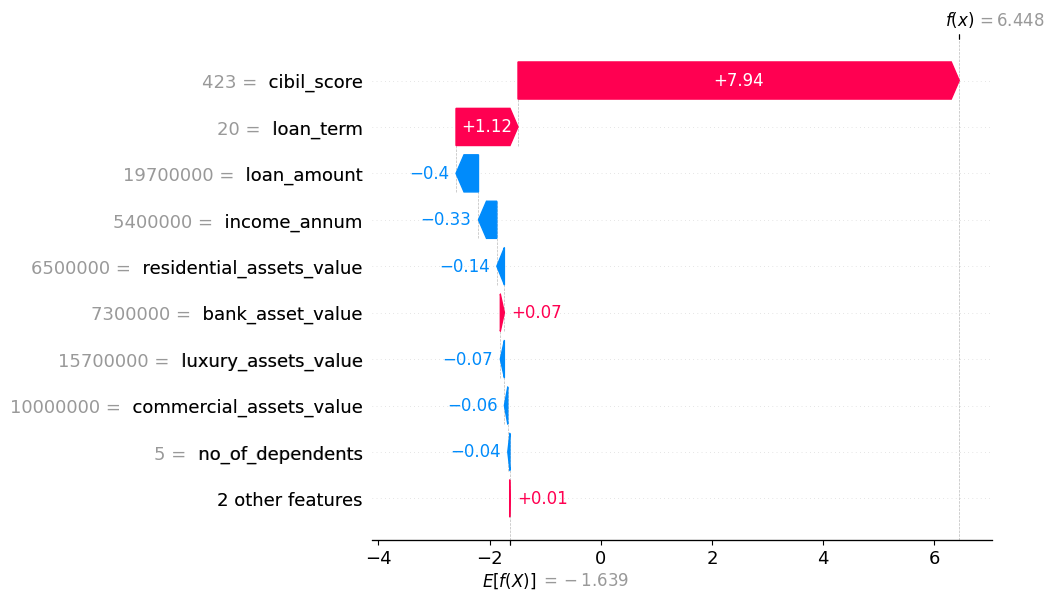

In [ ]:
shap.waterfall_plot(shap_values[0])

Force plot

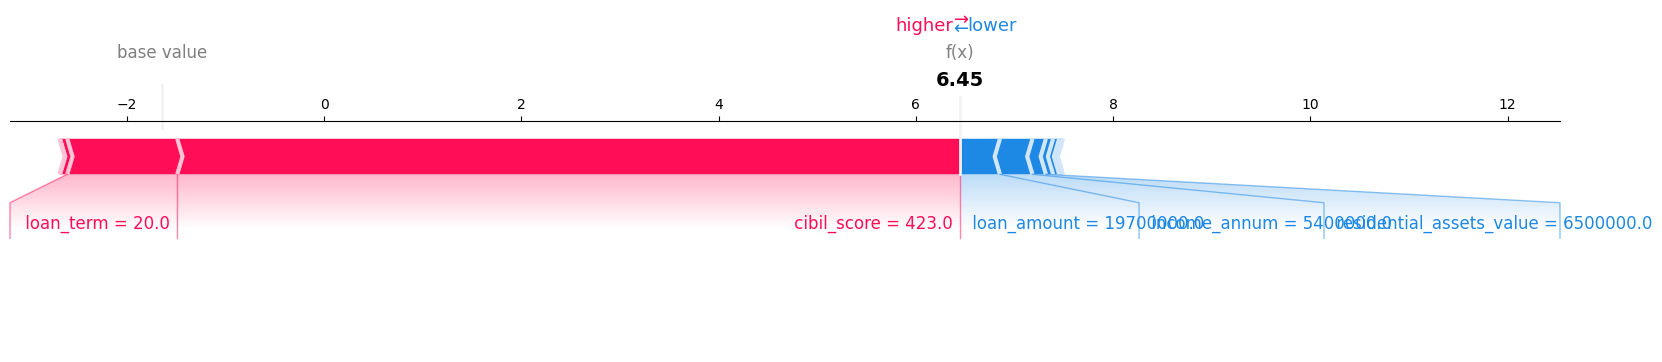

In [ ]:
if isinstance(shap_values, shap.Explanation):
    shap_values = shap_values.values

# Force plot for the first observation with matplotlib
# The expected_value is the model's expected output for the dataset
# The shap_values[0] represents the SHAP values for the first observation
# X_test.iloc[0, :] is the corresponding feature values for the first observation
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0, :], matplotlib=True)

summary plot

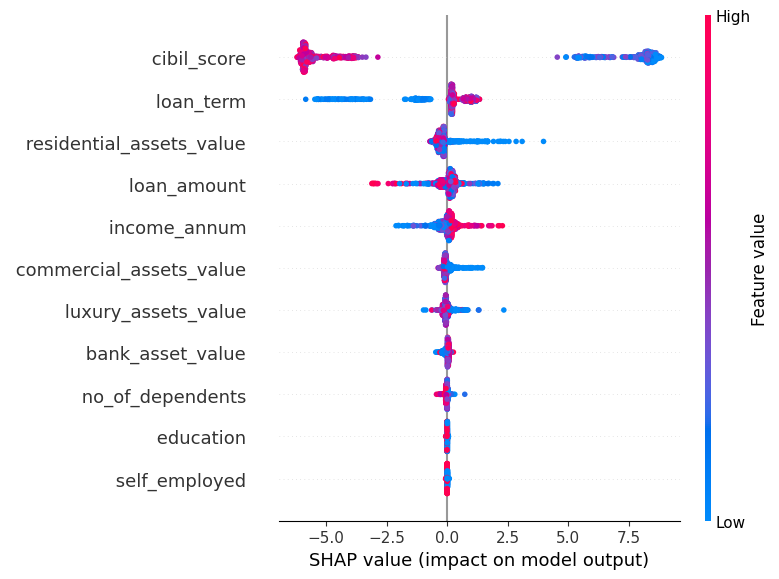

In [ ]:
shap.summary_plot(shap_values, X_test)

summary plot with Bar

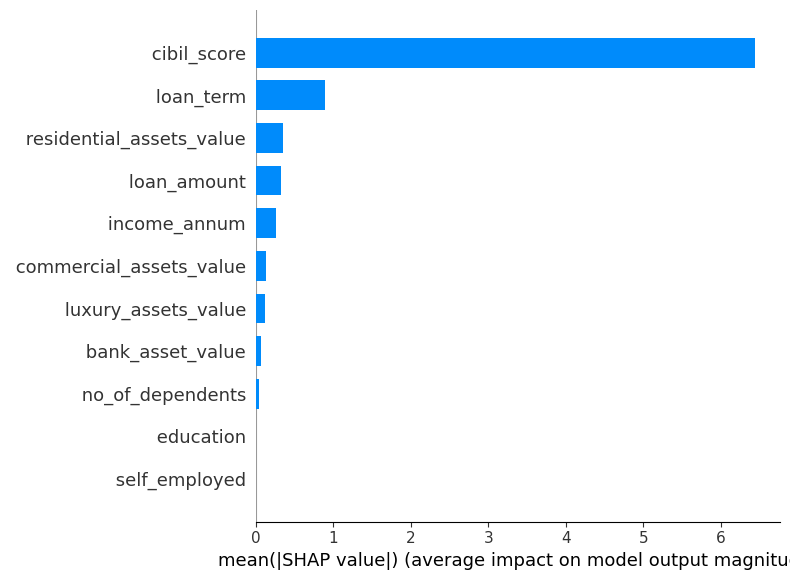

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

# Rejected sample example

Taking a random  rejected sample to test

In [ ]:
import random
rejecteddata=Loan_dataset[Loan_dataset[' loan_status']==1].drop(columns=' loan_status')
randomrejecteddata=rejecteddata.sample(1)
randomrejecteddata=pd.DataFrame(randomrejecteddata)

Predict  the rejected  random sample

In [ ]:
predict=best_model.predict(randomrejecteddata)
predict

array([1])

In [ ]:


shap_values = explainer(randomrejecteddata)

water fall plot for the rejected random sample. we can see that the loan is rejected Because it has less cibil score and loan term which are pusing the application to rejection

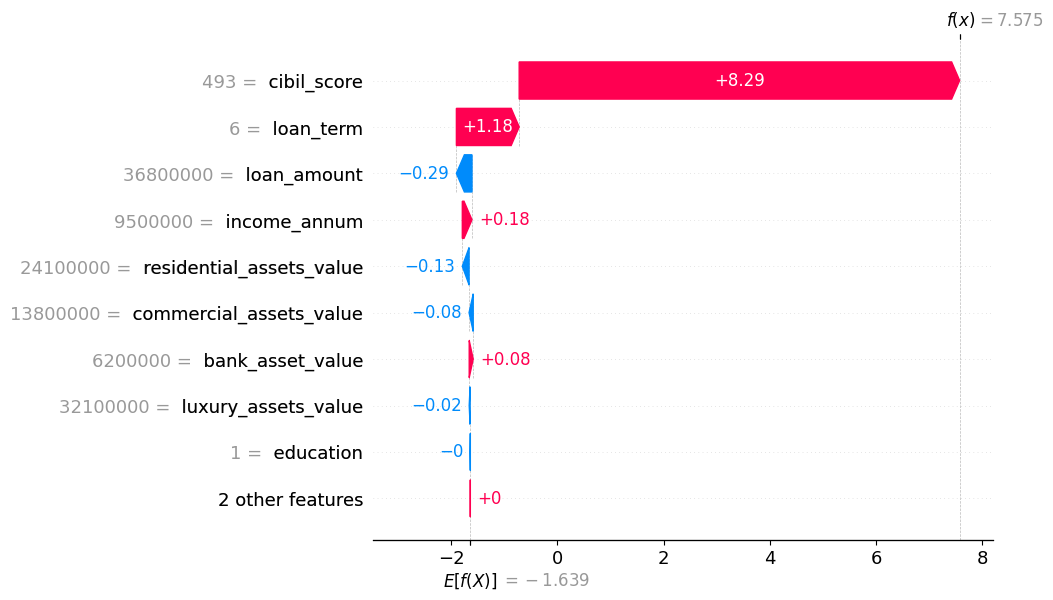

In [ ]:

shap.plots.waterfall(shap_values[0],max_display=10)


# Accepeted sample example

Taking a random accepted sample apllication and predicting it . we can see it is predicted as 0 which is accepted so machine learning algorithm performing good

In [ ]:
import random
accepteddata=Loan_dataset[Loan_dataset[' loan_status']==0].drop(columns=' loan_status')
randomaccepteddata=accepteddata.sample(1)
randomaccepteddata=pd.DataFrame(randomaccepteddata)
predict=best_model.predict(randomaccepteddata)
predict

array([0])

Checking why it is accepeted using shap waterfall plot . we can see that cibil score and residential asset values are pusing the application towards acceptence they are major contributers

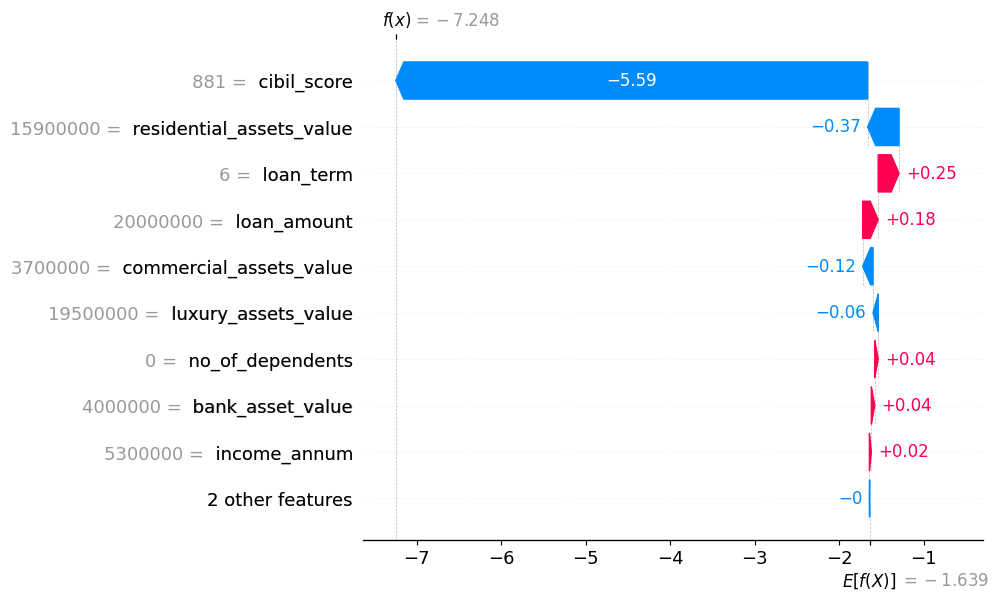

In [ ]:


shap_values = explainer(randomaccepteddata)
shap.plots.waterfall(shap_values[0],max_display=10)

**Conclusion :**This Project emphasizes the importance of incorporating Machine Learning (ML) and Explainable AI (XAI) in the loan approval process. Tree-based models like Gradient Boosting, with a 99% accuracy, proved highly effective for decision-making tasks. SHAP values enhanced the interpretability and fairness of these models, identifying key drivers such as CIBIL scores and loan terms. The integration of XAI ensures transparency, efficiency, and actionable insights for both lenders and borrowers. While XAI improves loan approval dynamics, further research is needed to refine hybrid methods for real-world applications.